In [1]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

In [2]:
tamanho = 5

# cria uma instancia da rede hopfield

hopfield = network.HopfieldNetwork(nr_neurons= tamanho**2)
factory = pattern_tools.PatternFactory(tamanho, tamanho)

#Cria o tabuleiro e adiciona a lista de padrões 

tabuleiro = factory.create_checkerboard()
padroes = [tabuleiro]
print(tabuleiro)


[[ 1 -1  1 -1  1]
 [-1  1 -1  1 -1]
 [ 1 -1  1 -1  1]
 [-1  1 -1  1 -1]
 [ 1 -1  1 -1  1]]


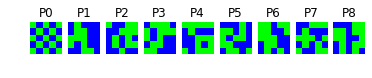

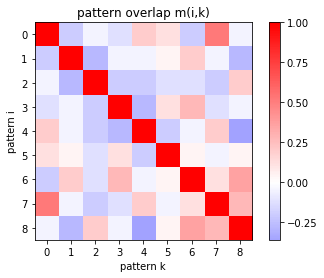

[[ 1.   -0.2  -0.04 -0.12  0.2   0.12 -0.2   0.52 -0.04]
 [-0.2   1.   -0.28 -0.04 -0.04  0.04  0.2  -0.04 -0.28]
 [-0.04 -0.28  1.   -0.2  -0.2  -0.12 -0.12 -0.2   0.2 ]
 [-0.12 -0.04 -0.2   1.   -0.28  0.12  0.28 -0.12 -0.04]
 [ 0.2  -0.04 -0.2  -0.28  1.   -0.2  -0.04  0.2  -0.36]
 [ 0.12  0.04 -0.12  0.12 -0.2   1.    0.04 -0.04  0.04]
 [-0.2   0.2  -0.12  0.28 -0.04  0.04  1.    0.12  0.36]
 [ 0.52 -0.04 -0.2  -0.12  0.2  -0.04  0.12  1.    0.28]
 [-0.04 -0.28  0.2  -0.04 -0.36  0.04  0.36  0.28  1.  ]]


In [9]:

#Adiciona padrões aleatoriamente a lista

padroes.extend(factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5))

#plotagem
plot_tools.plot_pattern_list(padroes)

# Matriz de sobreposicao para visualizar a convergencia

matriz_sobreposicao = pattern_tools.compute_overlap_matrix(padroes)

#plotagem
plot_tools.plot_overlap_matrix(matriz_sobreposicao)
print(matriz_sobreposicao)


In [4]:

# A rede vai aprender os padrões e armazenar
# Na verdade não armazena e sim atualiza os pesos da rede

hopfield.store_patterns(padroes)


In [5]:

#Cria uma versão distorcida do padrão e inicializa a rede 

estado_distorcido = pattern_tools.flip_n(tabuleiro, nr_of_flips=5)
hopfield.set_state_from_pattern(estado_distorcido )
print(estado_distorcido)


[[-1 -1  1  1  1]
 [-1  1 -1  1 -1]
 [ 1 -1 -1 -1  1]
 [ 1  1 -1  1 -1]
 [ 1 -1 -1 -1  1]]


In [6]:
#monitorando a evolução da rede

estados = hopfield.run_with_monitoring(nr_steps=6)



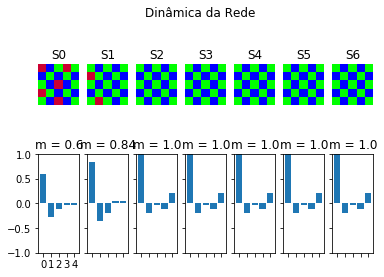

In [7]:
# cada estado da rede é um vetor. vai redesenhando para criar os padroes.

estado_padrao = factory.reshape_patterns(estados)

# Plotagem do estado da Rede 
plot_tools.plot_state_sequence_and_overlap(estado_padrao, padroes, reference_idx=0, suptitle="Dinâmica da Rede")